# Capstone Project-5
## Domain:
- Marketing for Financial Services
## Title:
- Exploratory Data Analysis and Predictive Modeling for Marketing Term-Deposit Scheme in the Financial Services Industry
## About:
- DB Bank is a large public sector bank that has branches across the cities. It provides various services like savings accounts, current accounts, term deposits, personal loans, home loans, etc. to customers. Whenever the bank conducts marketing on its new schemes, it will keep track of data related to customers’ personal, social, and economic details. Also, it maintains the detailing of efforts made to achieve success in the campaign. Recently, the bank has conducted a campaign to market its term-deposit scheme. Campaigns were conducted based mostly on direct phone calls, soliciting the bank's customers to place  a term deposit. After all the marketing efforts, if the client had agreed to place a deposit, then the campaign is a success, otherwise not (Target variable marked 'yes', or 'no').

## Checkpoint 1

<div style="background-color: skyblue; padding: 10px;"> <b><font size="4">Task 1.1(Data Manipulation and Visualization using Python)</font></b> </div>

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


### Loading dataset

In [2]:
# Load the data from CSV files
city_master_df = pd.read_csv('City_Master.csv')
customer_details_df = pd.read_csv('Customer_and_bank details_p1.csv')
customer_campaign_df = pd.read_csv('Customer_campaign_details_p1.csv')
customer_postal_code_df = pd.read_csv('Customer_Postal_Code_details.csv')
customer_response_df = pd.read_csv('Customer_Response_data_p1.csv')
customer_social_economic_df = pd.read_csv('Customer_social_economic_data_p1.csv')
region_code_master_df = pd.read_csv('Region_code_master.csv')
state_master_df = pd.read_csv('State_Master.csv')

#### Dataset that we have


##### city_master_df Dataset:
* This dataset contains city information including
    * State_Code: A unique code representing each state.
    * State_Name: The name of the state.
    * Region_Code: A code representing the region associated with each state
  
##### customer_details_df Dataset:

* This dataset contains detailed customer information.
    * Customer_id: A unique identifier for each customer.
    * age: The age of the customer.
    * job: The type of job the customer is employed in.
    * marital: The marital status of the customer.
    * education: The education level of the customer.
    * default: Indicates whether the customer has credit in default ("yes" or "no").
    * housing: Indicates whether the customer has a housing loan ("yes" or "no").
    * loan: Indicates whether the customer has a personal loan ("yes" or "no").
    * Region_Code: A code representing the region associated with the customer.
    * State_Code: A code representing the state associated with the customer.
    * City_Code: A code representing the city associated with the customer.

##### customer_campaign_df Dataset:

* This dataset includes details about customer campaigns, such as :- 
    * Customer_id: A unique identifier for each customer.
    * contact: The method of communication used to contact the customer (categorical).
    * month: The month in which the campaign was conducted (categorical).
    * day_of_week: The day of the week on which the campaign was conducted (categorical).
    * duration: The duration of the contact with the customer during the campaign (numeric).
    * campaign: The number of contacts performed during this campaign for this customer (numeric).
    * pdays: The number of days that passed after the customer was last contacted from a previous campaign (numeric).
    * previous: The number of contacts performed before this campaign for this customer (numeric).
    * poutcome: The outcome of the previous marketing campaign (categorical)

##### customer_postal_code_df Dataset:
* This dataset connects customer_id with Postal Code
    * customer_id: A unique identifier for each customer.
    * Postal Code: The postal code associated with each customer.

##### customer_response_df Dataset:

* This dataset holds information about customer responses:- 
    * Customer_id: A unique identifier for each customer.
    * y: Indicates whether the customer responded positively to a campaign ("yes" or "no").
        
##### customer_social_economic_df Dataset:

* This dataset provides socio-economic data for customers, such as :- 
    * Customer_id: A unique identifier for each customer.
    * emp.var.rate: Employment variation rate (numeric).
    * cons.price.idx: Consumer price index (numeric).
    * cons.conf.idx: Consumer confidence index (numeric).
    * euribor3m: Euribor 3-month rate (numeric).
    * nr.employed: Number of employees (numeric).


##### region_code_master_df Dataset:
* This dataset provides region information  
    * Region_Name: The name of the region.
    * Region_Code: A code representing each region.
    
##### state_master_df Dataset:

* This dataset provides details about states, including :- 
    * State_Code: A unique code representing each state.
    * State_Name: The name of the state.
    * Region_Code: A code representing the region associated with each state.

### Initial Analysis

In [3]:
city_master_df.head()

,City_Code,City_Name,State_Code
0,C1,Henderson,S1
1,C2,Los Angeles,S2
2,C3,Fort Lauderdale,S3
3,C4,Concord,S4
4,C5,Seattle,S5


In [4]:
customer_details_df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3


In [5]:
customer_campaign_df.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [6]:
customer_postal_code_df.head()

,customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311


In [7]:
customer_response_df.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [8]:
customer_social_economic_df.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0


In [9]:
region_code_master_df.head()

,Region_Name,Region_Code
0,Central,1
1,East,2
2,South,3
3,West,4
4,North,5


In [10]:
state_master_df.head()

,State_Code,State_Name,Region_Code
0,S1,Kentucky,3
1,S2,California,4
2,S3,Florida,3
3,S4,North Carolina,3
4,S5,Washington,4


Before we start with *data exploration* we might want to merge the dataframes into one or two dataframes. After looking through the csv files we decided to merge the dataframes in the following manner:

In [11]:
# rename customer_id coloumn of customer_postal_code to Customer_id
customer_postal_code_df = customer_postal_code_df.rename(columns={"customer_id":"Customer_id"})
customer_postal_code_df

,Customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311
...,...,...
37079,37080,10009
37080,37081,10011
37081,37082,10009
37082,37083,85254


In [12]:
customer_social_economic_df

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...
37079,37080,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
customer_social_economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   emp.var.rate    37084 non-null  float64
 2   cons.price.idx  37084 non-null  float64
 3   cons.conf.idx   37084 non-null  float64
 4   euribor3m       37084 non-null  float64
 5   nr.employed     37084 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.7 MB


In [14]:
customer_social_economic_df.isnull().sum()

Customer_id       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [15]:
for column in customer_social_economic_df.columns:
	print(column," ",customer_social_economic_df[column].unique())
	print("---------------------------------------------------")

Customer_id   [    1     2     3 ... 37082 37083 37084]
---------------------------------------------------
emp.var.rate   [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
---------------------------------------------------
cons.price.idx   [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
---------------------------------------------------
cons.conf.idx   [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
---------------------------------------------------
euribor3m   [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 

In [16]:
# merging
merged_customer_df = pd.merge(customer_details_df, customer_campaign_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_postal_code_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_social_economic_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_response_df, on='Customer_id', how='inner')

merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


### After merging all the datasets we have 
* Customer_id: Unique identifier for each customer.
* age: Age of the customer.
* job: Occupation or job category of the customer.
* marital: Marital status of the customer (married, single, divorced).
* education: Education level of the customer.
* default: Whether the customer has credit in default ('yes' or 'no').
* housing: Whether the customer has a housing loan ('yes' or 'no').
* loan: Whether the customer has a personal loan ('yes' or 'no').
* Region_Code: Region code associated with the customer's region.
* State_Code: State code associated with the customer's state.
* City_Code: City code associated with the customer's city.
* contact: Contact communication type ('telephone', 'cellular').
* month: Last contact month of the year.
* day_of_week: Last contact day of the week.
* duration: Duration of the last contact in seconds.
* campaign: Number of contacts performed during this campaign.
* pdays: Number of days that passed by after the customer was last contacted from a previous campaign.
* previous: Number of contacts performed before this campaign.
* poutcome: Outcome of the previous marketing campaign.
* Postal Code: Postal code of the customer.
* emp.var.rate: Employment variation rate.
* cons.price.idx: Consumer price index.
* cons.conf.idx: Consumer confidence index.
* euribor3m: Euribor 3-month rate.
* nr.employed: Number of employees.
* y : Whether a customer subscribed to a product or service ('yes' or 'no')

In [17]:
merged_customer_df.to_csv('merged_customer.csv')  # saving this dataframe in a separate csv file

In [18]:
area_merged_df = pd.merge(state_master_df, region_code_master_df, on='Region_Code', how='left')
area_merged_df = pd.merge(area_merged_df, city_master_df, on='State_Code', how='inner')

area_merged_df

,State_Code,State_Name,Region_Code,Region_Name,City_Code,City_Name
0,S1,Kentucky,3,South,C1,Henderson
1,S1,Kentucky,3,South,C103,Richmond
2,S1,Kentucky,3,South,C160,Florence
3,S1,Kentucky,3,South,C209,Murray
4,S1,Kentucky,3,South,C257,Bowling Green
...,...,...,...,...,...,...
526,S46,Idaho,4,West,C450,Pocatello
527,S46,Idaho,4,West,C461,Caldwell
528,S46,Idaho,4,West,C514,Twin Falls
529,S47,North Dakota,1,Central,C403,Fargo


In [19]:
area_merged_df.to_csv('area_details.csv')

### Data Exploration

In [20]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [21]:
# summary of numeric features
merged_customer_df.describe()

,Customer_id,age,duration,campaign,pdays,previous,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,55202.625553,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,32057.300954,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,56301.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* Age Distribution: The median age of bank clients is around 38 years, with clients spanning a wide age range from 17 to 98 years. This indicates a diverse customer base.

* Contact Duration: The 'duration' column shows varying call durations, with a median of approximately 180 seconds. However, the presence of high outliers and a large standard deviation suggests that some calls are exceptionally long.

* Campaign Reach: The median number of contacts during the campaign is 2, but the presence of a high maximum value (56) suggests that some clients were contacted frequently. Outliers might skew the average.

* Contact History: Most clients (at least 75%) were not previously contacted ('previous' and 'pdays' values). This might indicate a focus on new leads or infrequent recontacting of existing clients.

* Economic Indicators: The employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and number of employed individuals show varying degrees of stability and variability.

* Geographic Distribution:The dataset demonstrates a wide and diverse geographic spread, encompassing clients from various regions. This diversity could stem from the bank's strategic expansion across different locations, targeting both urban and rural areas. The inclusion of multiple postal codes indicates a comprehensive outreach strategy, possibly driven by the bank's commitment to providing financial services across diverse communities.

In [22]:
# summary of non-numeric features
merged_customer_df.describe(include='object')

,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,contact,month,day_of_week,poutcome,y
count,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084
unique,12,4,8,3,3,3,5,49,531,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,4,S2,C21,cellular,may,thu,nonexistent,no
freq,9420,22479,10971,29382,19433,30561,11884,7427,3422,23522,12420,7778,32023,32876


In [23]:
merged_customer_df.shape

(37084, 26)

In [24]:
merged_customer_df[merged_customer_df.duplicated()].sum()

Customer_id         0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
Region_Code         0
State_Code          0
City_Code           0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
Postal Code         0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                   0
dtype: object

So we are dealing with a dataset that has 26 total features

### Data Cleaning

#### Dealing with missing values

In [25]:
merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
# direct checking of null values
merged_customer_df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [27]:
# checking for a second time just to be sure
columns = merged_customer_df.columns

unknown_columns = []
for column in columns:
    unknown_count = (merged_customer_df[column] == 'unknown').sum()
    print(column, unknown_count)
    if unknown_count > 0:
        unknown_columns.append(column)


Customer_id 0
age 0
job 306
marital 72
education 1549
default 7700
housing 882
loan 882
Region_Code 0
State_Code 0
City_Code 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
Postal Code 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [28]:
# these are our columns with unknown variables for which we need to impute them
unknown_columns

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [29]:
def missing(data, unknown_value='unknown'):
    total = (data == unknown_value).sum().sort_values(ascending=False)
    percent = ((data == unknown_value).sum() / data.shape[0] * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(merged_customer_df)

,Total,Percent
default,7700,20.763672
education,1549,4.177004
housing,882,2.378384
loan,882,2.378384
job,306,0.825154
marital,72,0.194154
Customer_id,0,0.000000
pdays,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [30]:
# we replace these unknown values with the mode as tere are only 2 yes for default and majority is no,
# so mode seems to be the appropriate approach 
merged_customer_df['default'].value_counts()

default
no         29382
unknown     7700
yes            2
Name: count, dtype: int64

In [31]:
# for the rest of the columns we impute the data using the median
for column in unknown_columns:
    mode = merged_customer_df[column].mode()
    merged_customer_df[column].replace(to_replace=['unknown'], value=mode, inplace=True)
missing(merged_customer_df)

,Total,Percent
Customer_id,0,0.0
age,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
Postal Code,0,0.0
poutcome,0,0.0
previous,0,0.0


#### Dealing with outliers

In [32]:
# looking for outliers in our numeric data
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [33]:
numeric_columns = merged_customer_df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Customer_id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'Postal Code', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

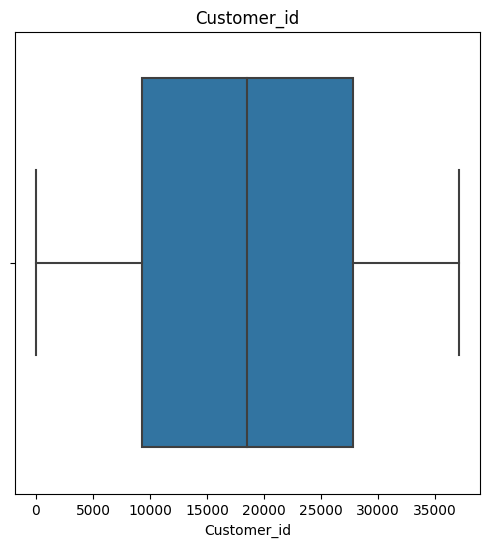

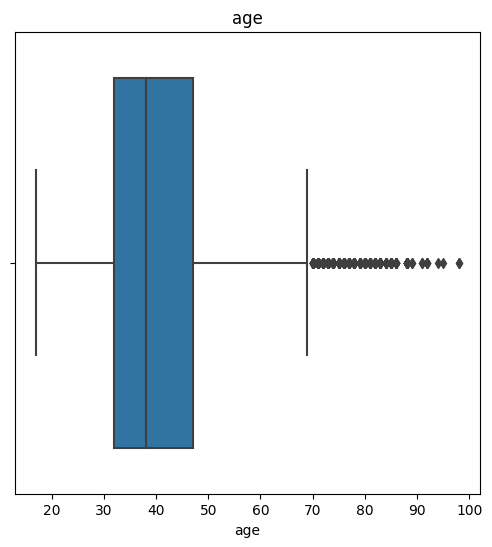

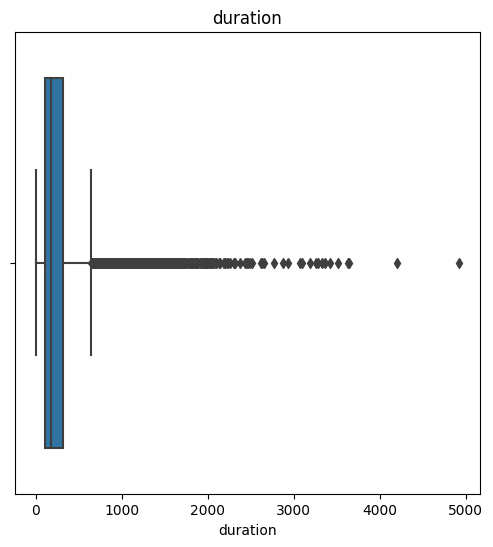

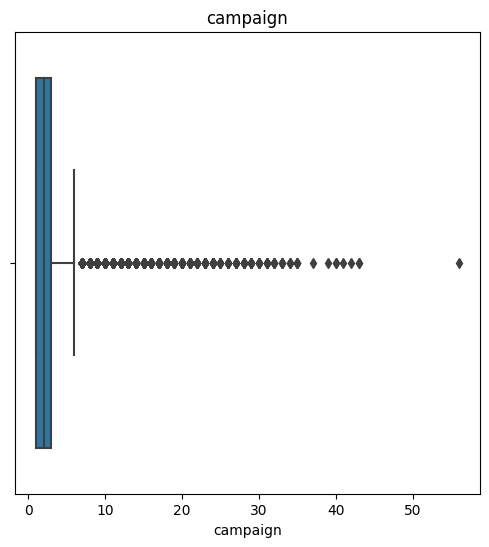

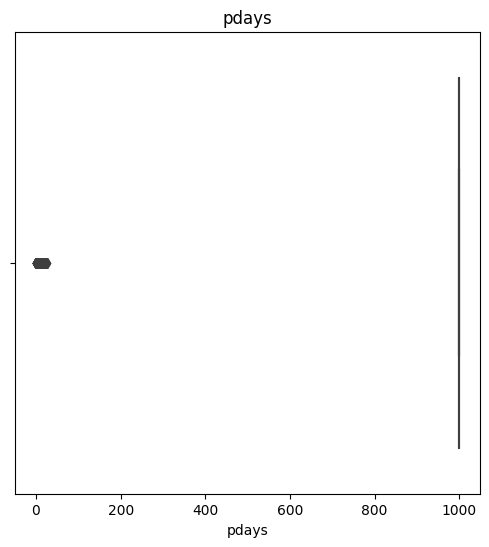

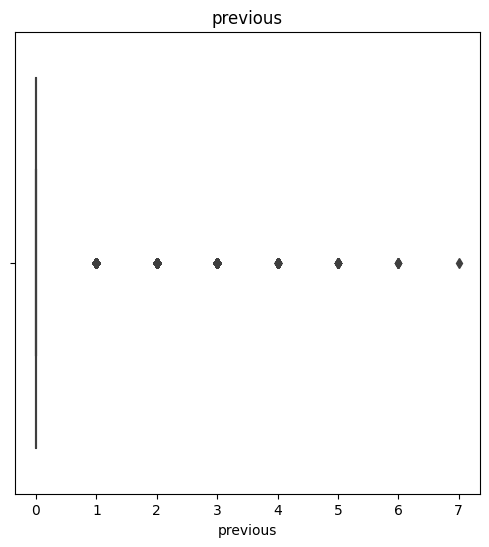

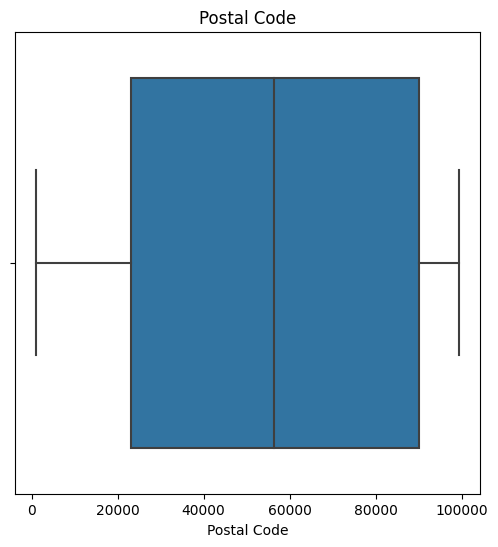

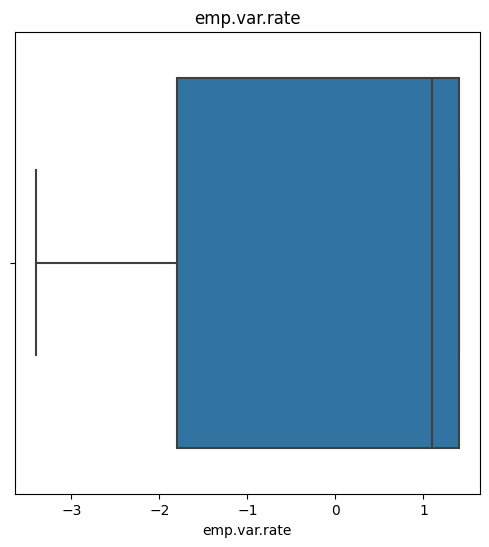

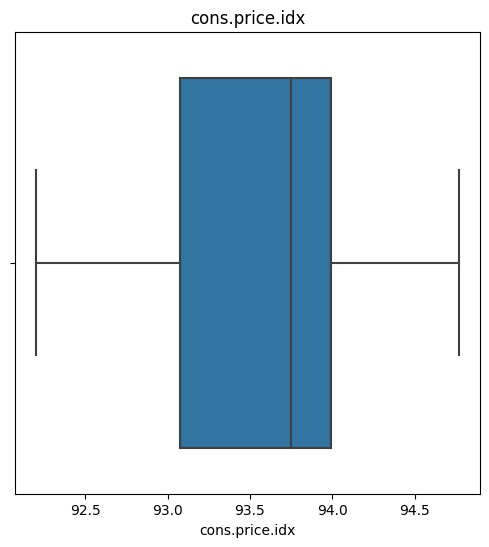

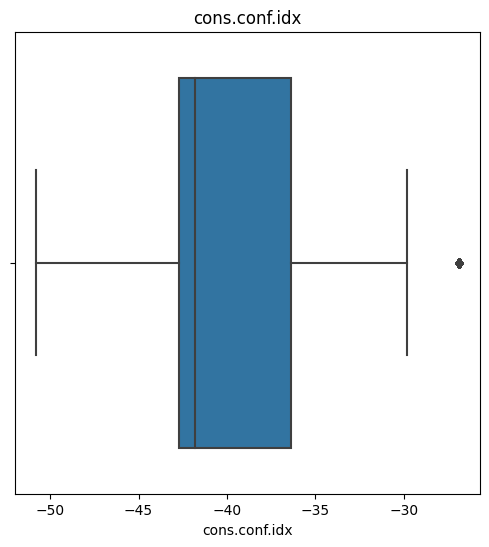

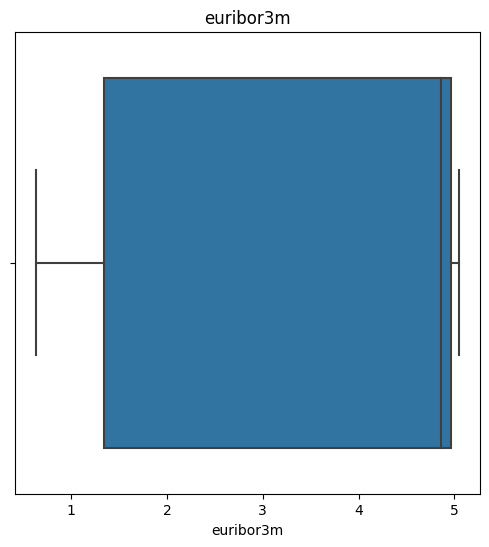

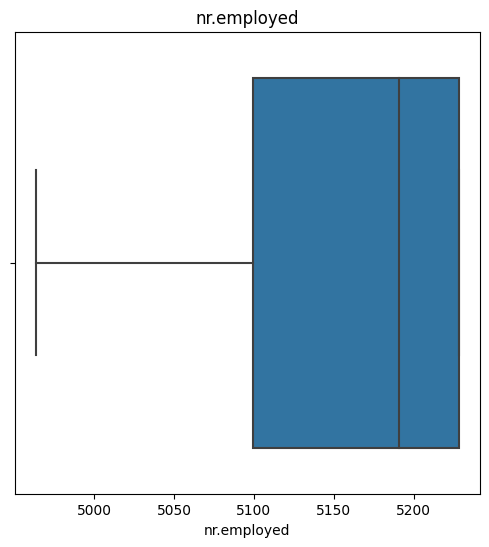

In [34]:
# visualizing outliers for the columns
for column in numeric_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

* This visualization helps to quickly assess and identify potential outliers in numeric data columns.
* Each box plot visually displays the distribution of data points within the column, 
  helping to identify potential outliers. The x-axis represents the column's values, 
  and the box indicates the interquartile range (IQR) of the data. 
  Points outside the "whiskers" of the box plot may indicate outliers.
* The analysis of the dataset using box plots has revealed that the 
  columns 'age', 'campaign', and 'duration' likely contain outliers.
* This implies that these columns have values that are notably different from the majority of the dataset. 


In [35]:
# from eyeballing, we make a list of the columns that contain an outlier
outlier_columns = ['age', 'campaign', 'duration']

In [36]:
# Remove outliers using IQR method
for column in outlier_columns:
    Q1 = merged_customer_df[column].quantile(0.25)
    Q3 = merged_customer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    merged_customer_df = merged_customer_df[(merged_customer_df[column] > Q1 - 1.5 * IQR) & (merged_customer_df[column] < Q3 + 1.5 * IQR)]

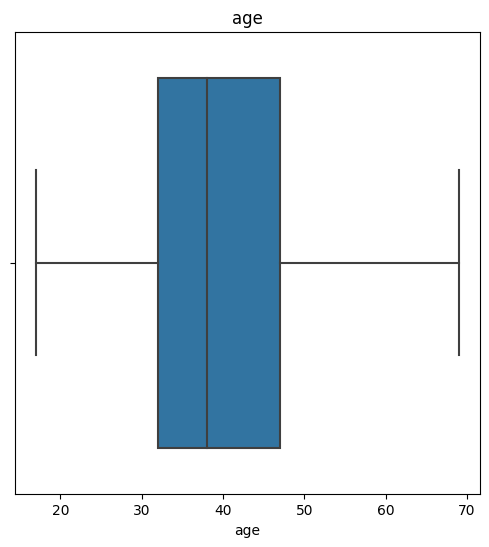

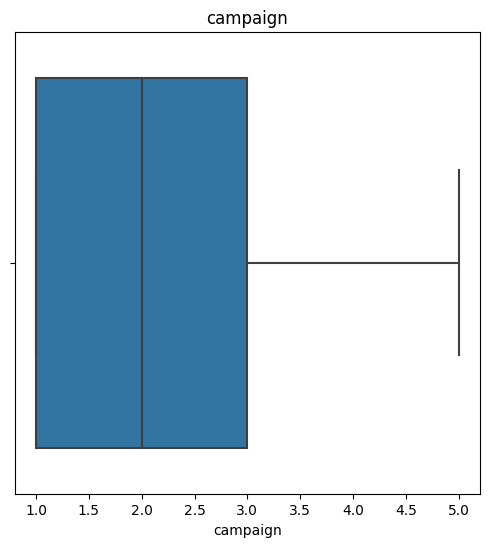

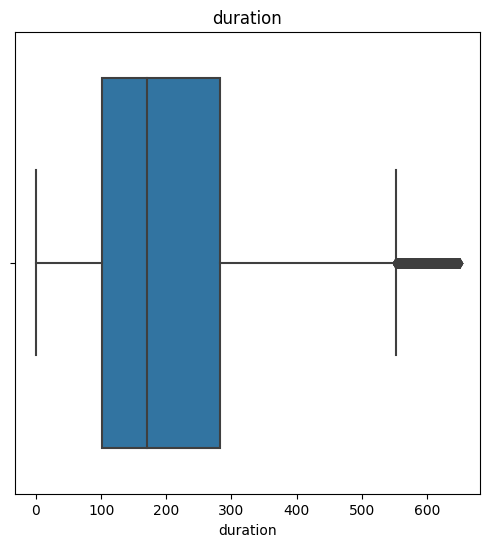

In [37]:
for column in outlier_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

### Data Visualization

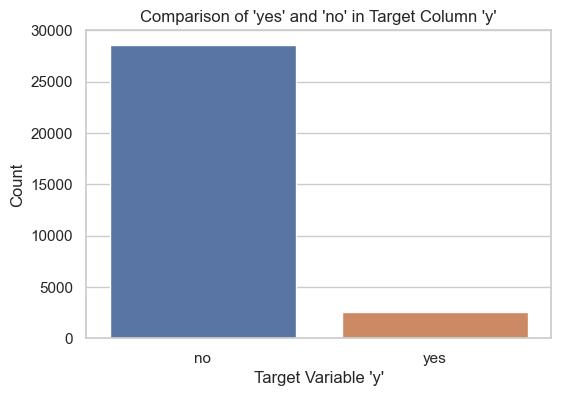

In [38]:
sns.set(style="whitegrid")

# Count Plot to Compare 'yes' and 'no' values in the 'y' column
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_customer_df, x='y')
plt.title("Comparison of 'yes' and 'no' in Target Column 'y'")
plt.xlabel("Target Variable 'y'")
plt.ylabel("Count")
plt.show()

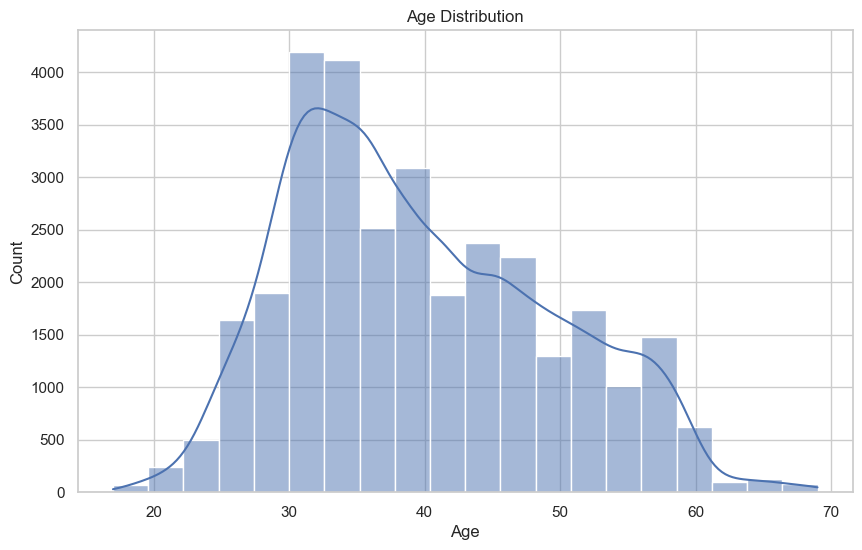

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_customer_df, x='age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

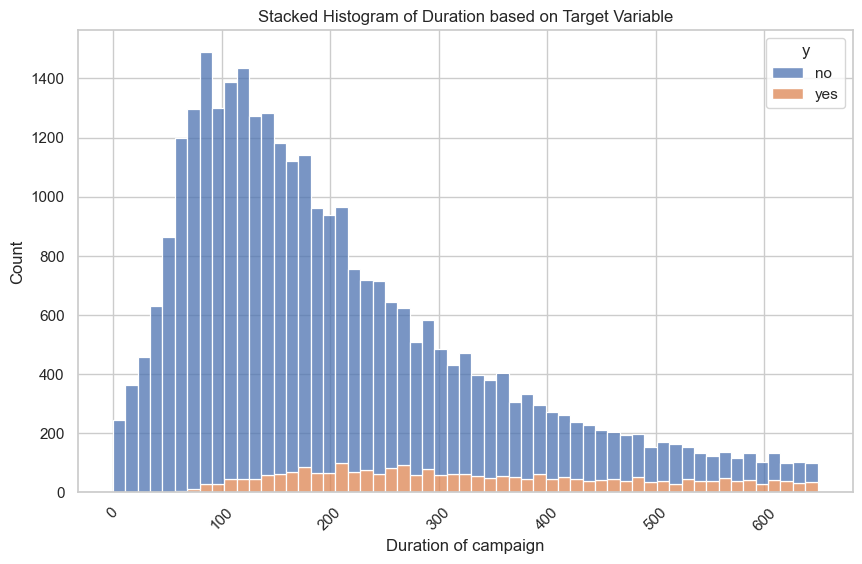

In [40]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Stacked Histogram of Marital Status based on Target Variable (y)
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_customer_df, x='duration', hue='y', multiple='stack')
plt.title("Stacked Histogram of Duration based on Target Variable")
plt.xlabel("Duration of campaign")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

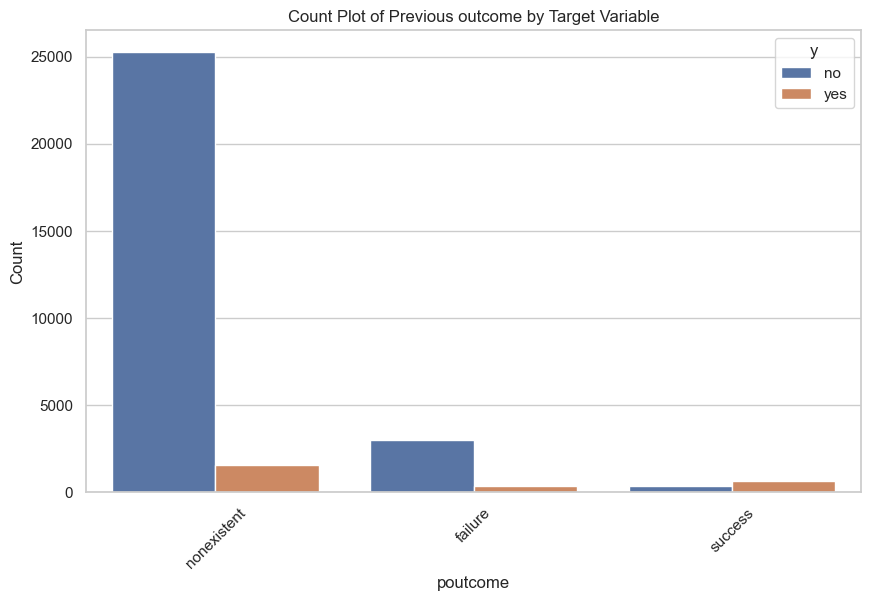

In [41]:
# countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_customer_df, x='poutcome', hue='y')
plt.title("Count Plot of Previous outcome by Target Variable")
plt.xlabel("poutcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

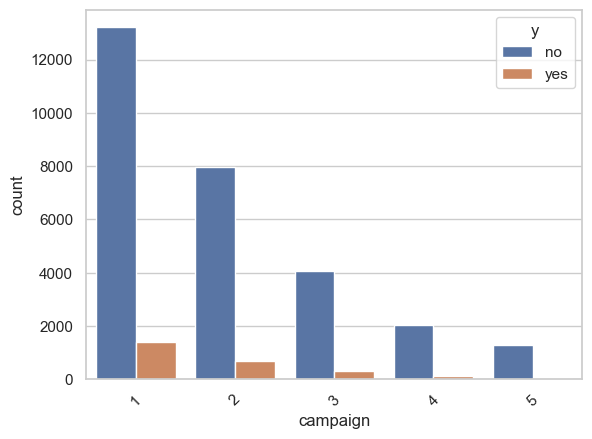

In [42]:
sns.countplot(x='campaign', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

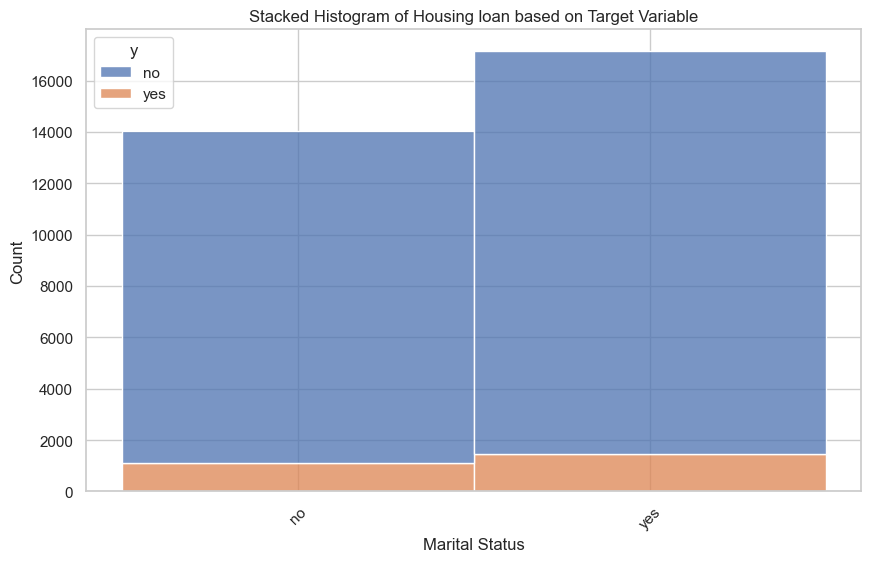

In [43]:
# Stacked Histogram of Marital Status based on Target Variable (y)
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_customer_df, x='housing', hue='y', multiple='stack')
plt.title("Stacked Histogram of Housing loan based on Target Variable")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

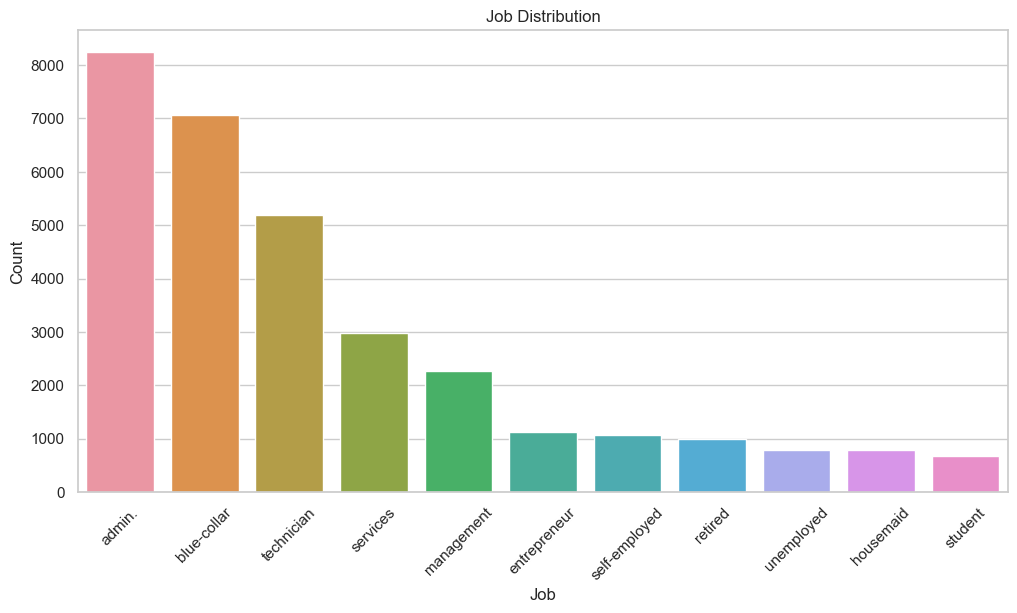

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_customer_df, x='job', order=merged_customer_df['job'].value_counts().index)
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

* We first removing potential outliers from the dataset using the IQR method. 
* Then, you visualize the impact of this outlier removal on the data distribution through box plots.
* This process helps assess how the data changes after removing outliers and
  provides insight into the effectiveness of the outlier removal technique. 

### Data Transformation

#### Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on your numeric features
merged_customer_df[numeric_columns] = scaler.fit_transform(merged_customer_df[numeric_columns])

#### Label encoding 

In [46]:
merged_customer_df['y'] = merged_customer_df['y'].replace({'yes': 1, 'no': 0})
merged_customer_df['y']

0        0
1        0
2        0
3        0
4        0
        ..
37077    0
37078    1
37080    0
37081    0
37082    1
Name: y, Length: 31181, dtype: int64

* After label encoding, the 'y' column in the merged_customer_df DataFrame will contain binary numeric values (1 for 'yes' and 0 for 'no'). 
 This encoding is particularly helpful for machine learning algorithms that require numerical input, 
 enabling us to seamlessly integrate the response data into our analysis.

In [47]:
# looking at all the categorical features
merged_customer_df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'Region_Code', 'State_Code', 'City_Code', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')

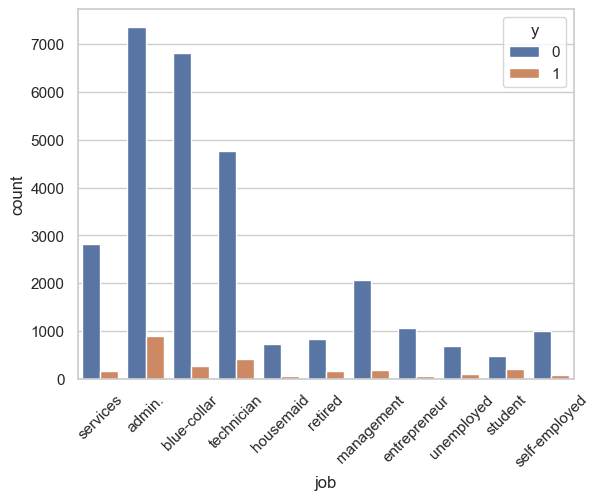

In [48]:
sns.countplot(x='job', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

* The plot helps identify how different job types are associated with campaign responses. 
  A higher number of 'yes' responses in certain job categories could suggest that
  those jobs are more responsive to the campaign. 

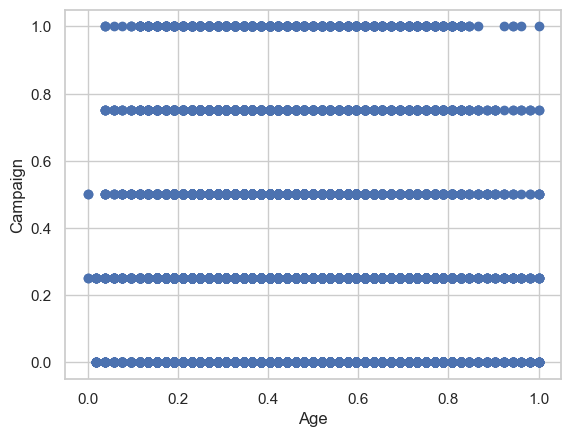

In [49]:
plt.scatter(x='age', y='campaign', data=merged_customer_df)
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.show()

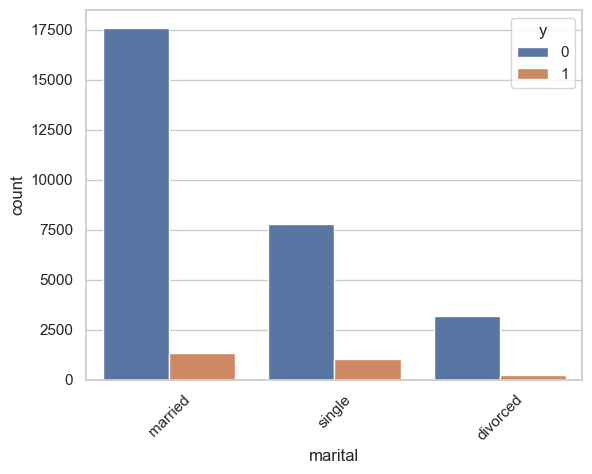

In [50]:
sns.countplot(x='marital', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

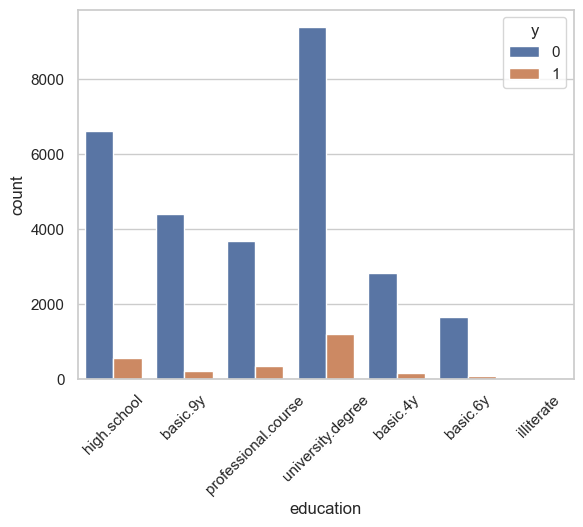

In [51]:
sns.countplot(x='education', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

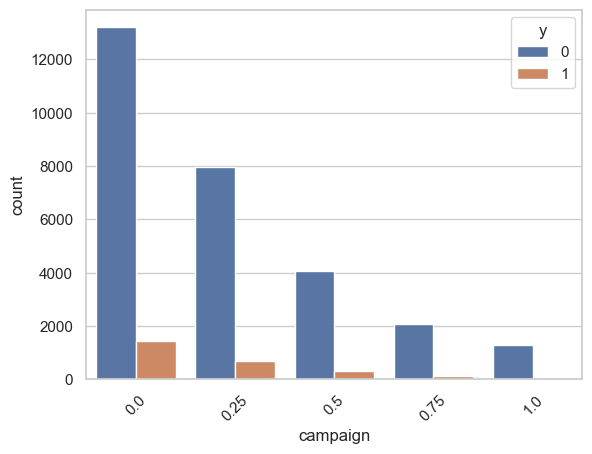

In [52]:
sns.countplot(x='campaign', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

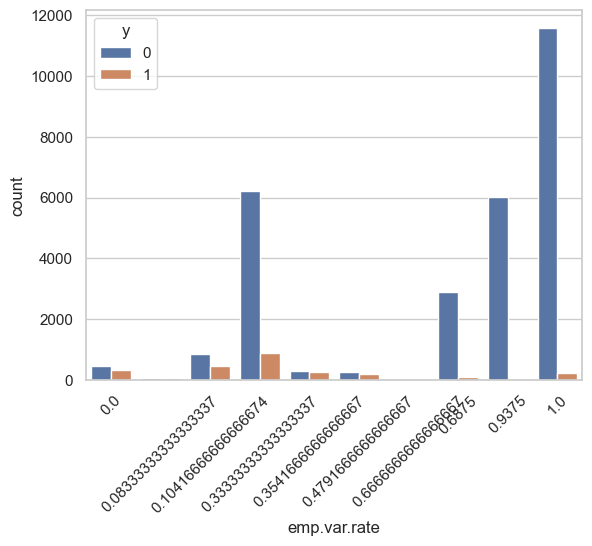

In [53]:
sns.countplot(x='emp.var.rate', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

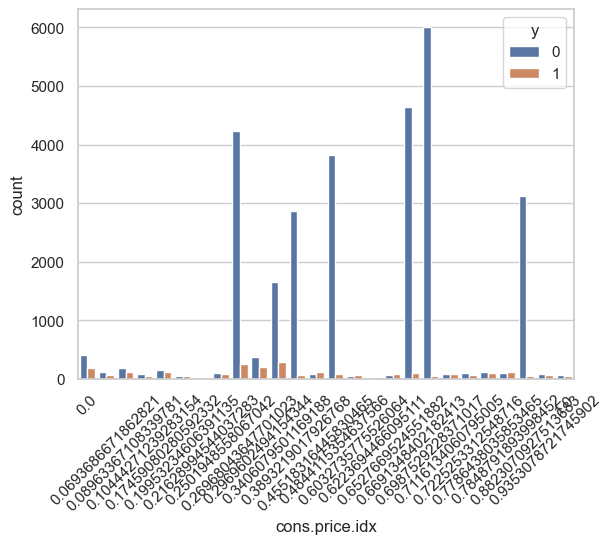

In [54]:
sns.countplot(x='cons.price.idx', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

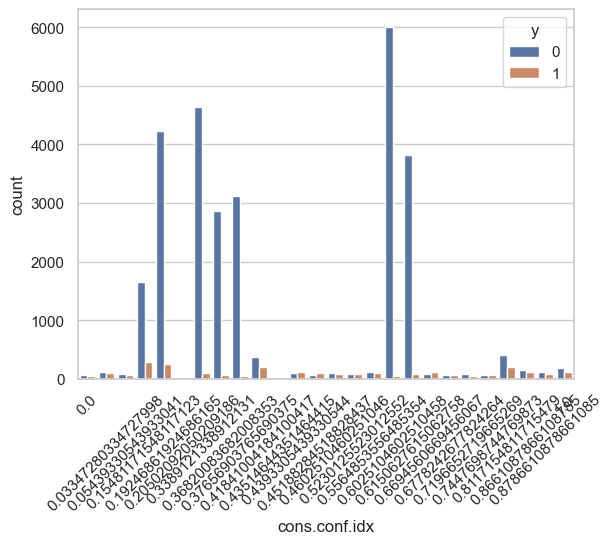

In [55]:
sns.countplot(x='cons.conf.idx', hue='y', data=merged_customer_df)
plt.xticks(rotation=45)
plt.show

* These visualizations collectively provide valuable insights into various factors influencing the outcome, 
  allowing for a better understanding of their relationships and distributions within the dataset.

In [56]:
columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Postal Code', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [57]:
object_columns = []
for column in columns:
    if(merged_customer_df[column].dtype  == 'object'):
        object_columns.append(column)

object_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'Region_Code',
 'State_Code',
 'City_Code',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [58]:
# filtering based on column has binary data or not
binary_columns = []
ordinal_columns = []

for column in object_columns:
    if len(merged_customer_df[column].value_counts()) == 2:
        binary_columns.append(column)
    else:
        ordinal_columns.append(column)
binary_columns, ordinal_columns

(['default', 'housing', 'loan', 'contact'],
 ['job',
  'marital',
  'education',
  'Region_Code',
  'State_Code',
  'City_Code',
  'month',
  'day_of_week',
  'poutcome'])

In [59]:
for column in binary_columns:
    if column == 'contact':
        merged_customer_df[column] = merged_customer_df[column].replace({'cellular':1, 'telephone':0})
    else:
        merged_customer_df[column] = merged_customer_df[column].replace({'yes':1,'no':0})
for column in binary_columns:
    print(column,"\t",merged_customer_df[column].unique())

default 	 [0 1]
housing 	 [0 1]
loan 	 [1 0]
contact 	 [0 1]


* Binary categorical columns in the DataFrame merged_customer_df are encoded by replacing 'yes' with 1 and 'no' with 0, facilitating numerical analysis.
 Subsequently, each binary column's unique values are displayed, showing the transformed representation of binary data for analysis.

In [60]:
ordinal_encoder = OrdinalEncoder()

merged_customer_df[ordinal_columns] = ordinal_encoder.fit_transform(merged_customer_df[ordinal_columns])

for column in ordinal_columns:
    print(column," ",merged_customer_df[column].unique(),"\n----------------------------\n")

job   [ 7.  0.  1.  9.  3.  5.  4.  2. 10.  8.  6.] 
----------------------------

marital   [1. 2. 0.] 
----------------------------

education   [3. 2. 5. 6. 0. 1. 4.] 
----------------------------

Region_Code   [2. 3. 4. 0. 1.] 
----------------------------

State_Code   [ 0. 11. 22. 33. 44. 45. 46. 47. 48.  1.  2.  3.  4.  5.  6.  7.  8.  9.
 10. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43.] 
----------------------------

City_Code   [  0. 111. 222. 333. 444. 487. 498. 509. 520.   1.  12.  23.  34.  45.
  56.  67.  78.  89. 100. 112. 123. 134. 145. 156. 167. 178. 189. 200.
 211. 223. 234. 245. 256. 267. 278. 289. 300. 311. 322. 334. 345. 356.
 367. 378. 389. 400. 411. 422. 433. 445. 456. 467. 478. 481. 482. 483.
 484. 485. 486. 488. 489. 490. 491. 492. 493. 494. 495. 496. 497. 499.
 500. 501. 502. 504. 505. 506. 507. 508. 510. 511. 512. 513. 514. 515.
 516. 517. 518. 519. 522. 523. 524. 525. 526. 527. 528.

#### Feature Engineering

In [61]:
# pdays of 999 should be changed with 0
merged_customer_df['pdays'] = merged_customer_df['pdays'].replace(to_replace=999, value=0)
merged_customer_df['pdays'].value_counts()

pdays
1.000000    30061
0.003003      329
0.006006      288
0.004004       93
0.009009       47
0.002002       46
0.012012       45
0.007007       41
0.010010       40
0.005005       35
0.013013       26
0.011011       22
0.001001       22
0.015015       15
0.014014       15
0.008008       14
0.016016       10
0.000000       10
0.017017        8
0.018018        4
0.022022        3
0.021021        2
0.025025        1
0.026026        1
0.027027        1
0.020020        1
0.019019        1
Name: count, dtype: int64

In [62]:
merged_customer_df = merged_customer_df.drop(columns='Customer_id', axis=-1)

In [63]:
merged_customer_df

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.750000,7.0,1.0,3.0,0,0,1,2.0,0.0,0.0,...,1.0,0.0,1.0,0.421123,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.538462,7.0,1.0,2.0,0,0,0,2.0,0.0,0.0,...,1.0,0.0,1.0,0.421123,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.807692,0.0,1.0,5.0,0,0,0,3.0,11.0,111.0,...,1.0,0.0,1.0,0.905710,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.461538,1.0,1.0,6.0,0,0,0,2.0,22.0,222.0,...,1.0,0.0,1.0,0.328421,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.134615,9.0,2.0,5.0,0,1,0,2.0,22.0,222.0,...,1.0,0.0,1.0,0.328421,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,0.903846,5.0,0.0,5.0,0,1,0,1.0,7.0,123.0,...,1.0,0.0,1.0,0.091277,0.479167,1.000000,0.00000,0.089322,0.000000,0
37078,0.384615,0.0,1.0,6.0,0,1,0,1.0,7.0,123.0,...,1.0,0.0,1.0,0.091277,0.479167,1.000000,0.00000,0.089322,0.000000,1
37080,0.557692,1.0,1.0,5.0,0,0,0,1.0,7.0,123.0,...,1.0,0.0,1.0,0.091298,0.479167,1.000000,0.00000,0.089322,0.000000,0
37081,0.750000,5.0,1.0,6.0,0,1,0,1.0,7.0,123.0,...,1.0,0.0,1.0,0.091277,0.479167,1.000000,0.00000,0.089322,0.000000,0


<div style="background-color: skyblue; padding: 10px;"> <b><font size="4">TASK 1.2 (Exploratory Data Analysis & Statistical Analysis)</font></b> </div>

### EDA

#### Dealing with multicolinearality

In [64]:
# updating the columns list
columns = merged_customer_df.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'Region_Code', 'State_Code', 'City_Code', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Postal Code', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [65]:
correlation = merged_customer_df.corr()
correlation

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.028767,-0.390690,-0.108568,0.006946,-0.006276,-0.005615,-0.006705,-0.005719,0.000112,...,0.002583,-0.021501,0.020102,-0.004582,0.069440,0.037579,0.101127,0.082480,0.067169,-0.015783
job,-0.028767,1.000000,0.029067,0.140049,0.012065,0.006458,-0.013938,0.000248,-0.002074,0.001330,...,-0.021024,0.018493,0.005802,0.000128,-0.005605,-0.015392,0.040039,-0.005775,-0.014237,0.025093
marital,-0.390690,0.029067,1.000000,0.106302,-0.002322,0.015480,0.002987,0.004170,0.002123,0.004896,...,-0.046339,0.048432,0.002765,0.009128,-0.100561,-0.066261,-0.025649,-0.108387,-0.107633,0.069392
education,-0.108568,0.140049,0.106302,1.000000,0.004931,0.013266,0.007914,-0.006211,0.001864,0.005387,...,-0.055243,0.044231,0.017537,0.006249,-0.062685,-0.097458,0.085534,-0.053902,-0.060232,0.085494
default,0.006946,0.012065,-0.002322,0.004931,1.000000,-0.000795,-0.003385,-0.003955,0.011544,-0.009170,...,0.001546,-0.002845,0.001630,-0.000623,0.006853,-0.001674,0.007639,0.006283,0.006904,-0.002407
housing,-0.006276,0.006458,0.015480,0.013266,-0.000795,1.000000,0.035502,0.002151,-0.009783,0.003386,...,-0.009621,0.022674,-0.012369,0.007435,-0.056498,-0.075024,-0.032514,-0.055917,-0.043322,0.012601
loan,-0.005615,-0.013938,0.002987,0.007914,-0.003385,0.035502,1.000000,-0.003033,-0.007249,-0.008090,...,0.002745,-0.001435,-0.003899,-0.011064,0.000699,-0.003849,-0.013815,-0.002009,0.002538,-0.007948
Region_Code,-0.006705,0.000248,0.004170,-0.006211,-0.003955,0.002151,-0.003033,1.000000,-0.098504,0.200240,...,-0.003538,-0.001966,0.005752,0.475452,-0.003205,0.002706,-0.001203,-0.003312,-0.007077,0.004015
State_Code,-0.005719,-0.002074,0.002123,0.001864,0.011544,-0.009783,-0.007249,-0.098504,1.000000,0.173441,...,0.006487,-0.000149,-0.007534,0.280361,-0.002179,-0.004317,0.001517,0.000857,0.004390,0.001656
City_Code,0.000112,0.001330,0.004896,0.005387,-0.009170,0.003386,-0.008090,0.200240,0.173441,1.000000,...,-0.001583,-0.001084,0.002828,0.338406,-0.000600,0.003489,0.000550,0.000036,0.000723,0.000200


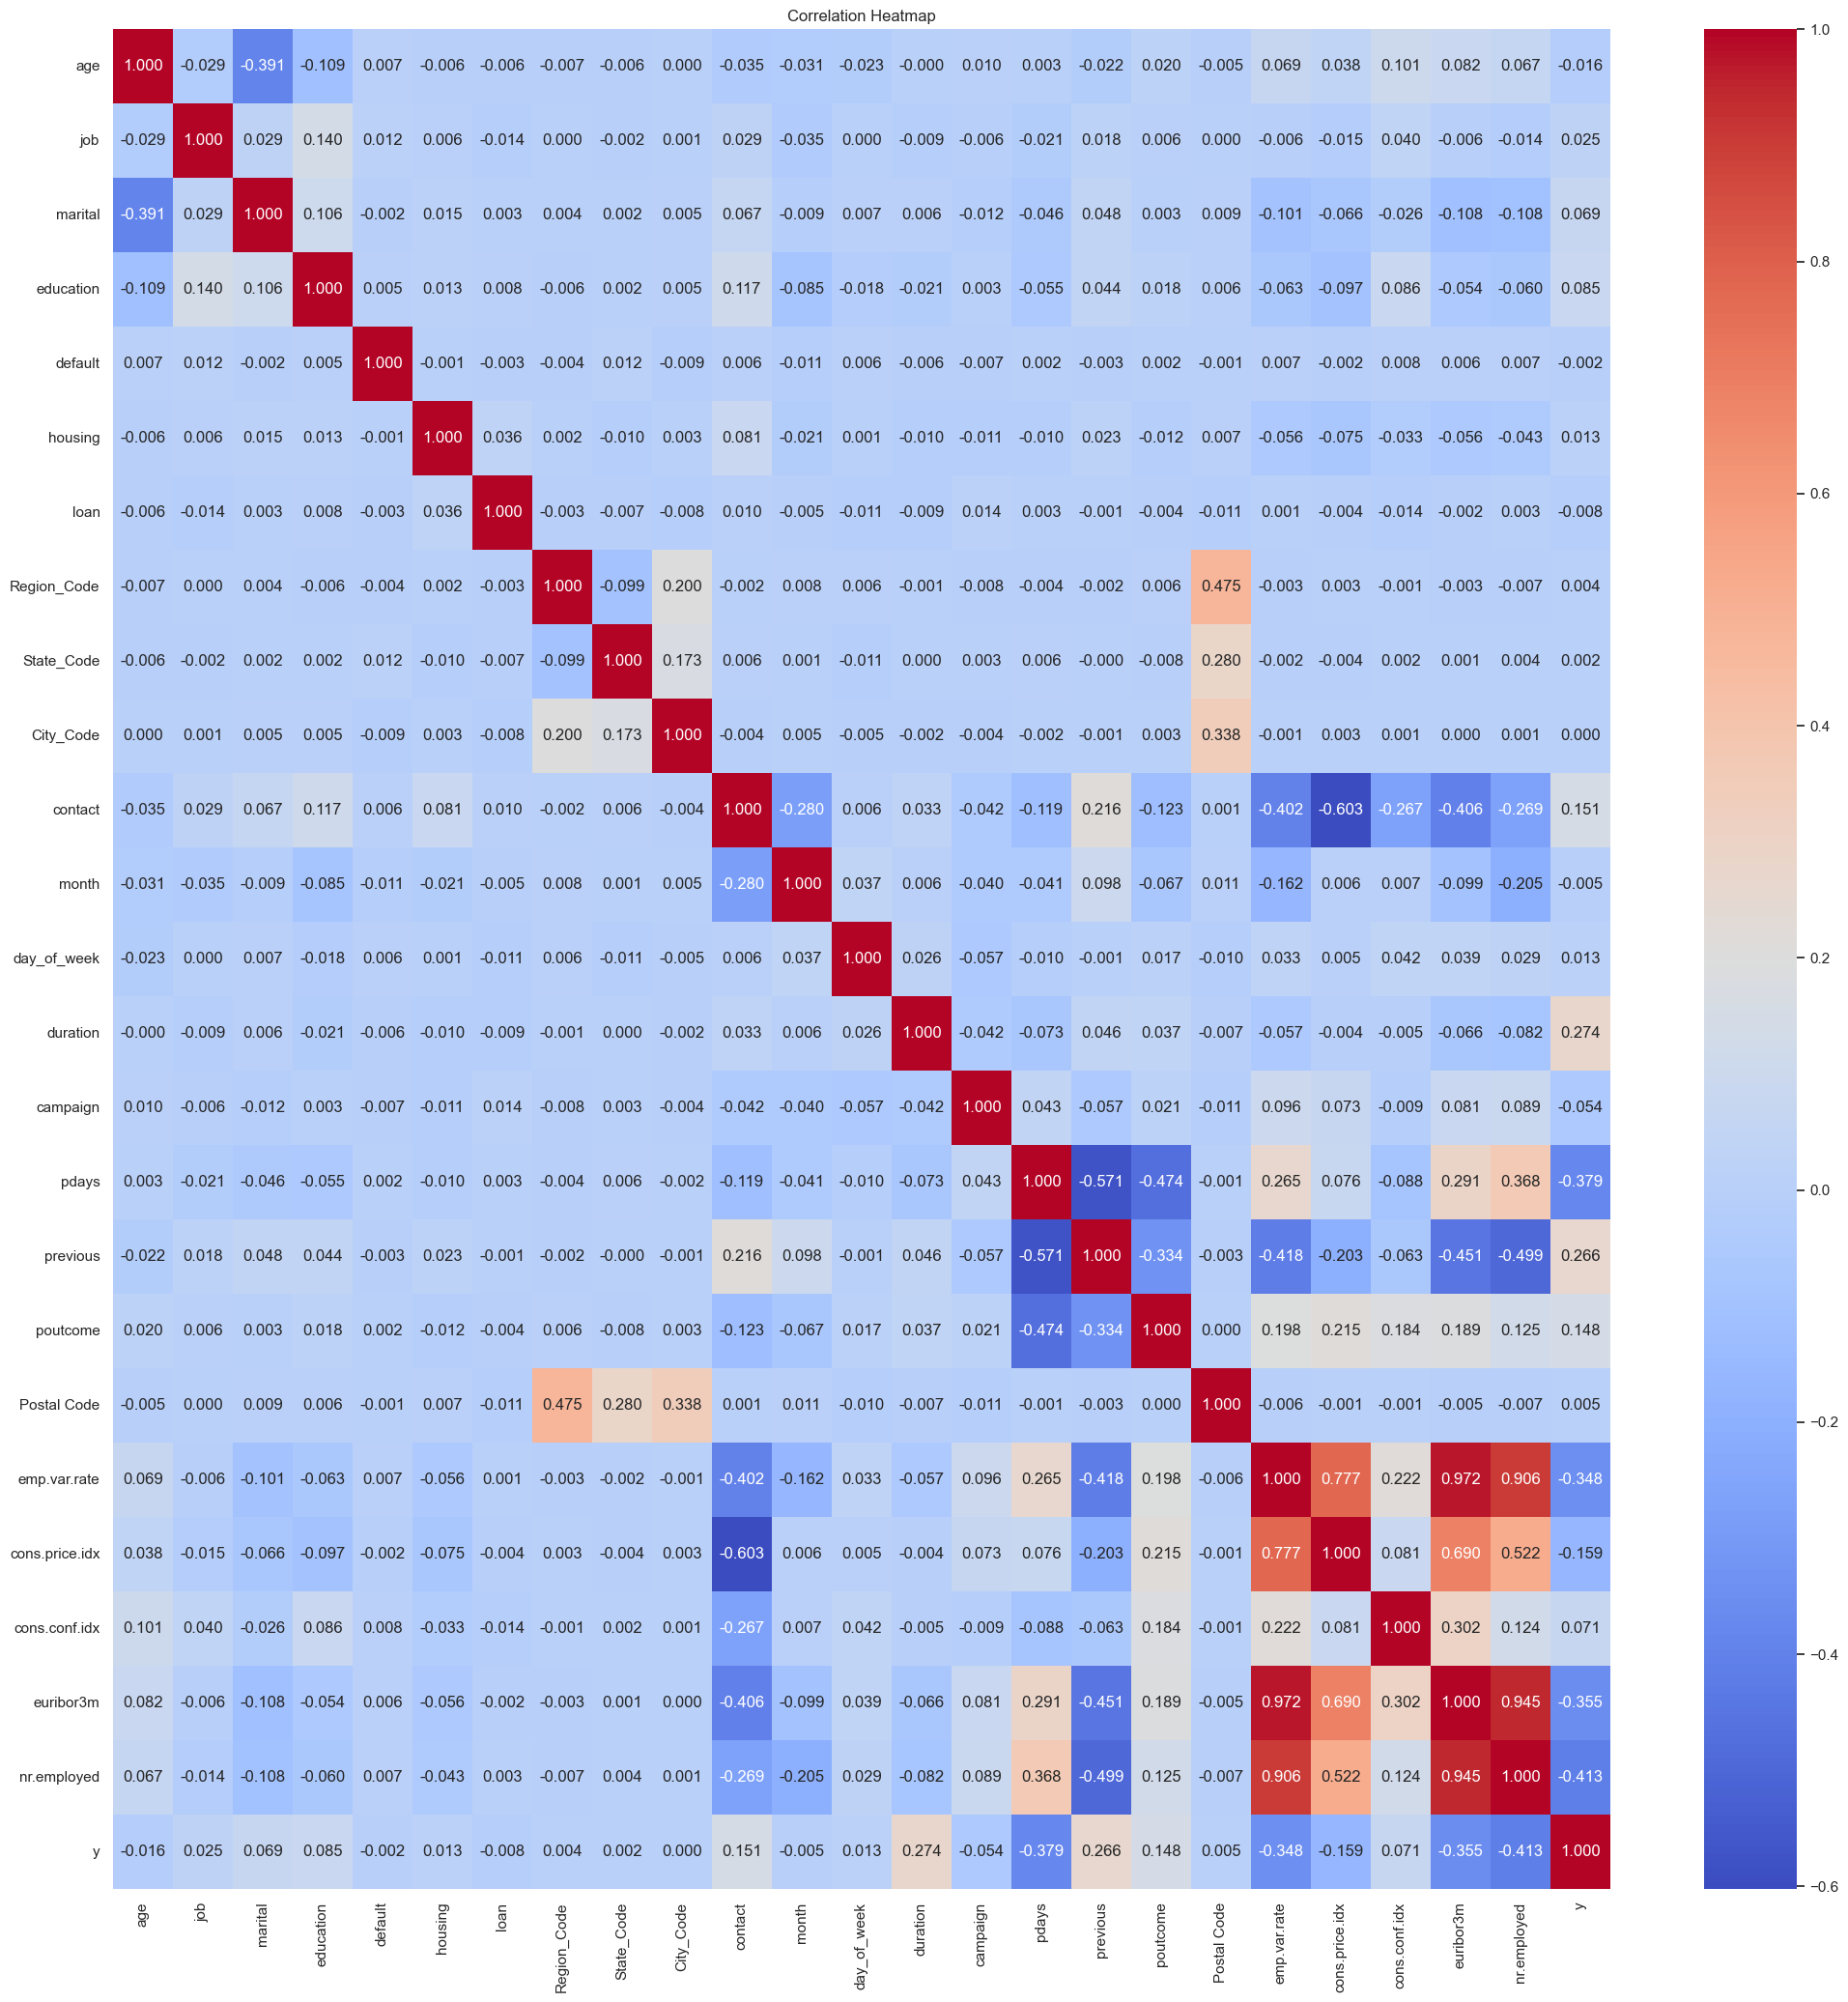

In [66]:
# Generate the heatmap
plt.figure(figsize=(25,25))
sns.heatmap(merged_customer_df.corr(), annot=True, cmap='coolwarm',fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

* Each cell in the heatmap represents the correlation coefficient between two variables, with color indicating the strength and direction of the correlation. Positive correlations are shown in warm colors (reds), negative correlations in cool colors (blues), and no correlation in neutral colors. 
* The larger the absolute value of the correlation coefficient, the more intense the color. 
* The annotations inside the cells display the correlation coefficients with up to three decimal places.
* The columns 'default', 'Postal Code', 'Region_code', 'State_Code', 'City_Code', and 'month' are identified as weakly correlated based on the correlation heatmap
* These weak correlations suggest that changes in these variables may not strongly influence changes in other numeric attributes, indicating a potential lack of direct linear relationships.

In [67]:
# eye-balled the data
strongly_corelated_columns = ['nr.employed', 'euribor3m', 'emp.var.rate', 'cons.price.idx', 'pdays', 'duration', 'previous', 'contact', 'poutcome']

In [68]:
correlation['y'].sort_values(ascending=False)

y                 1.000000
duration          0.273806
previous          0.266330
contact           0.151090
poutcome          0.147693
education         0.085494
cons.conf.idx     0.071129
marital           0.069392
job               0.025093
day_of_week       0.013475
housing           0.012601
Postal Code       0.004665
Region_Code       0.004015
State_Code        0.001656
City_Code         0.000200
default          -0.002407
month            -0.004824
loan             -0.007948
age              -0.015783
campaign         -0.053927
cons.price.idx   -0.159059
emp.var.rate     -0.348047
euribor3m        -0.355302
pdays            -0.379091
nr.employed      -0.413402
Name: y, dtype: float64

In [69]:
k = 18
imp_cols = correlation.nlargest(k//2, 'y')['y'].index.append(correlation.nsmallest(k//2, 'y')['y'].index)
# imp_cols = correlation.nlargest(k, 'y')['y'].index
imp_cols, len(imp_cols) 

(Index(['y', 'duration', 'previous', 'contact', 'poutcome', 'education',
        'cons.conf.idx', 'marital', 'job', 'nr.employed', 'pdays', 'euribor3m',
        'emp.var.rate', 'cons.price.idx', 'campaign', 'age', 'loan', 'month'],
       dtype='object'),
 18)

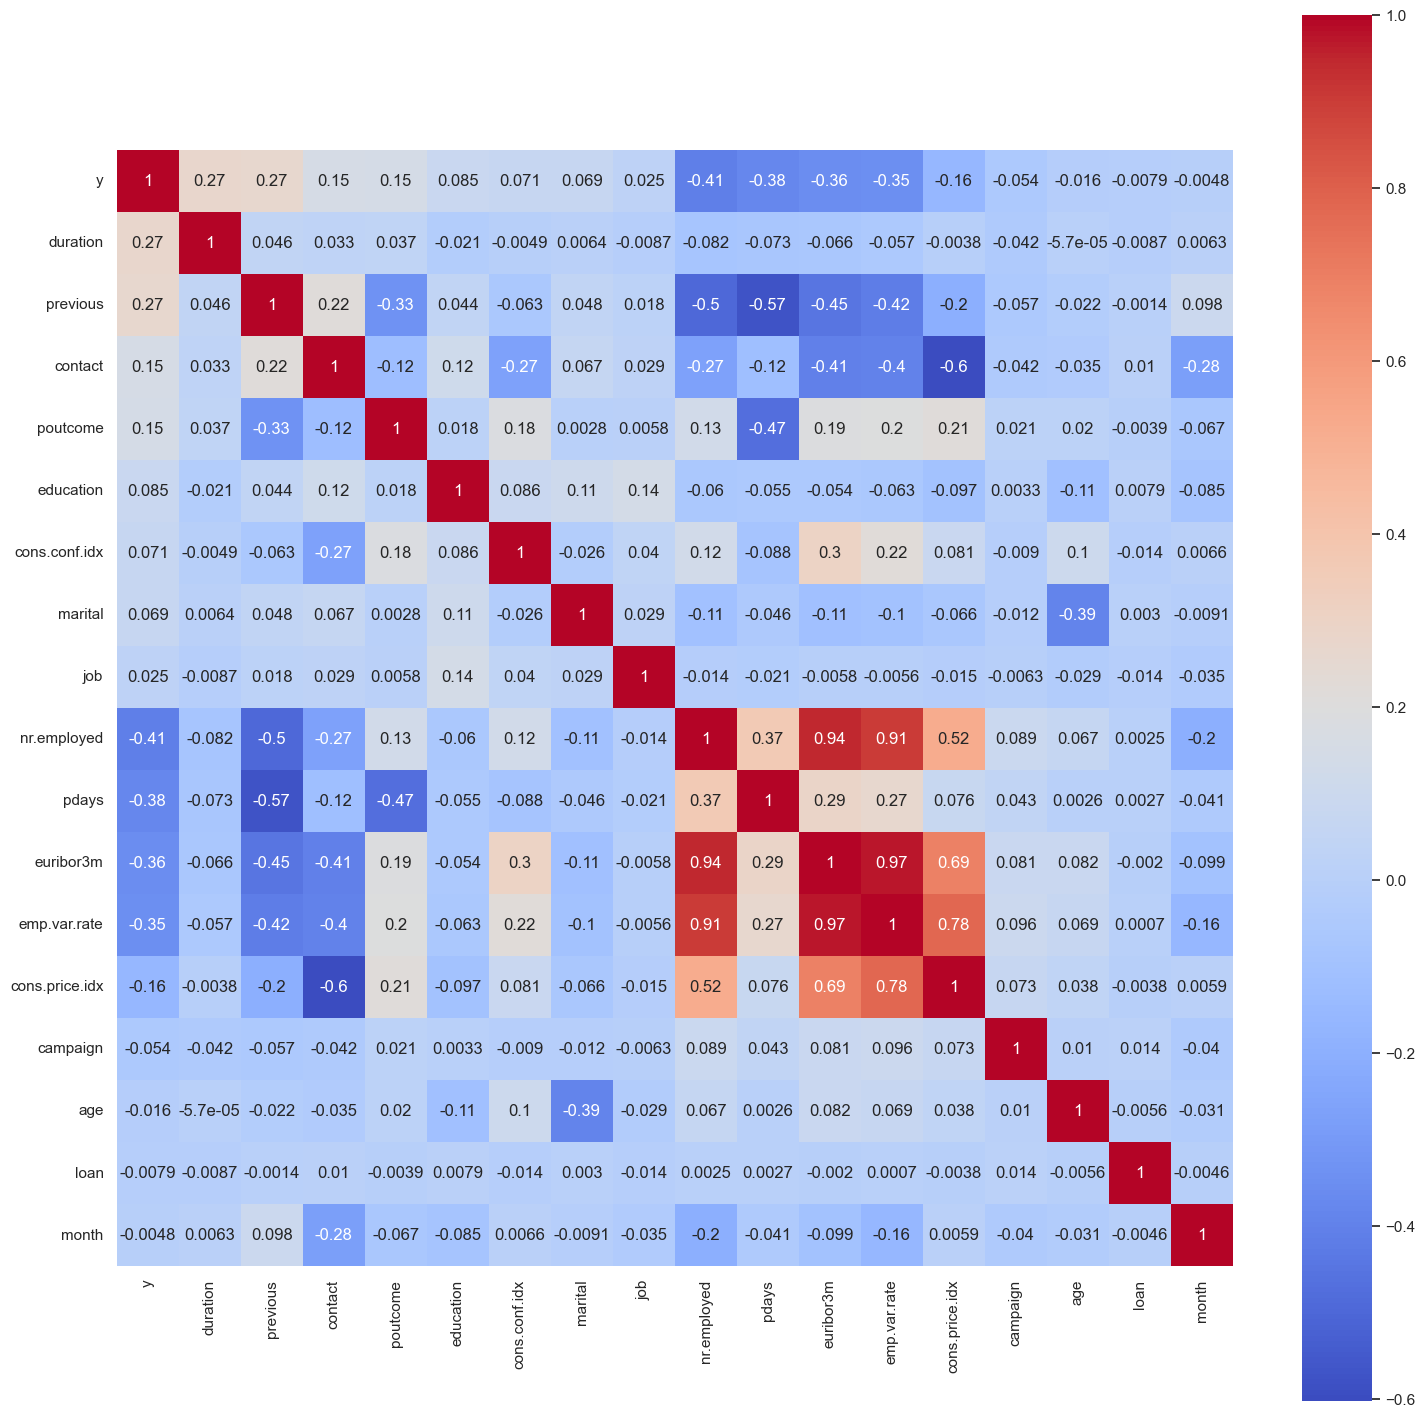

In [70]:
cm = np.corrcoef(merged_customer_df[imp_cols].values.T)
plt.figure(figsize=(18, 18))
sns.heatmap(cm, square=True, annot=True, xticklabels=imp_cols.values, yticklabels=imp_cols.values, cmap='coolwarm')
plt.show()

`nr.employed` seems to be highly correlated with `euribor3m` and `emp.var.rate`, this shows that there is multicolinearality. We also find multicolinearality between `pdays` and `previous` and `pdays` and `poutcome`. We keep the features with a strong colinearality and remove the other features.

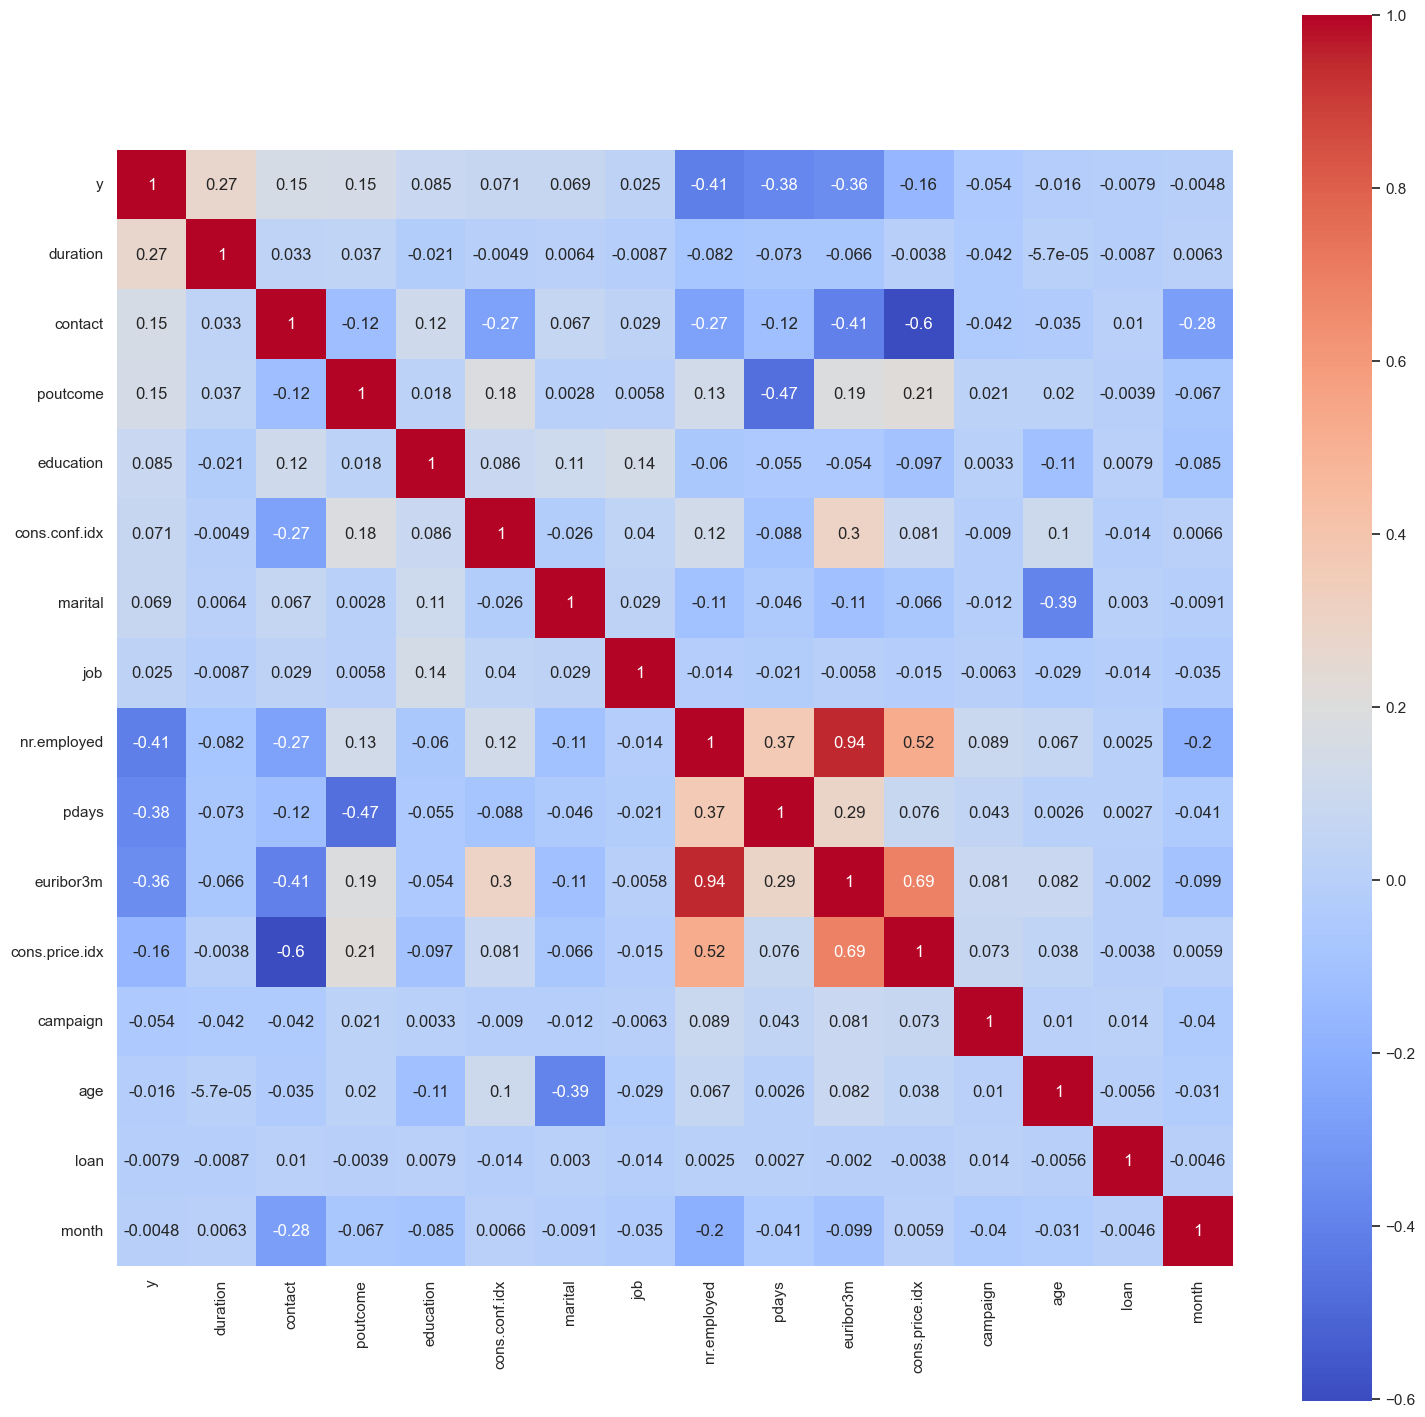

In [71]:
final_data = merged_customer_df[imp_cols].drop(columns=['emp.var.rate', 'previous'])
final_data_corr = final_data.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(final_data_corr, square=True, annot=True, cmap='coolwarm')
plt.show()

In [72]:
final_data = final_data.sample(frac=0.8, random_state=42)
final_data.reset_index(inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24945 entries, 0 to 24944
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           24945 non-null  int64  
 1   y               24945 non-null  int64  
 2   duration        24945 non-null  float64
 3   contact         24945 non-null  int64  
 4   poutcome        24945 non-null  float64
 5   education       24945 non-null  float64
 6   cons.conf.idx   24945 non-null  float64
 7   marital         24945 non-null  float64
 8   job             24945 non-null  float64
 9   nr.employed     24945 non-null  float64
 10  pdays           24945 non-null  float64
 11  euribor3m       24945 non-null  float64
 12  cons.price.idx  24945 non-null  float64
 13  campaign        24945 non-null  float64
 14  age             24945 non-null  float64
 15  loan            24945 non-null  int64  
 16  month           24945 non-null  float64
dtypes: float64(13), int64(4)
memory

## Checkpoint 2

### Splitting data

In [73]:
X = final_data.drop(columns=['y', 'index']) 
y = final_data['y']
accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
def plot_predictions(predicted_labels, y_test=y_test):
    cm = confusion_matrix(y_test, predicted_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

### Building the model

#### Logistic Regression

In [75]:
logreg_model = LogisticRegression(max_iter=5000)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_logreg = logreg_model.predict(X_test)

Trains a logistic regression model on training data (X_train, y_train) and predicts class labels (y_pred) for test data (X_test) to evaluate its binary classification performance.

In [76]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
accuracies.append(accuracy)
accuracy

0.9430747644818601

In [77]:
report = classification_report(y_test, y_pred_logreg)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.69      0.44      0.53       373

    accuracy                           0.94      4989
   macro avg       0.82      0.71      0.75      4989
weighted avg       0.94      0.94      0.94      4989



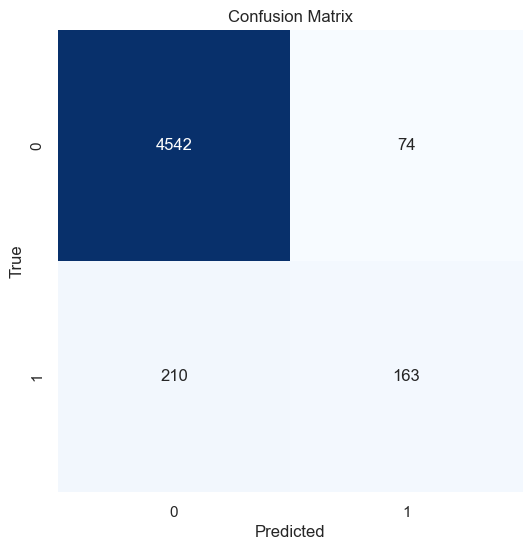

In [78]:
# confusion matrix for logistic regression model
plot_predictions(y_pred_logreg)

The model achieved a high accuracy of 93%, primarily due to its strong performance on the majority class (class 0) with high precision and recall. However, its performance on the minority class (class 1) is considerably lower, indicated by low recall and F1-score, suggesting room for improvement in correctly identifying instances of class 1. The weighted average F1-score of 0.89 indicates an overall decent balance between precision and recall across both classes.

#### Random Forest

In [79]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=300, verbose=1,random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_rf = random_forest_model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Initializes and trains a Random Forest classifier with 300 trees, utilizing verbose output for progress updates, and a fixed random state for reproducibility. The model is trained on the provided training data (X_train, y_train). Subsequently, it predicts class labels for the test data (X_test) and stores the predictions in the y_pred_rf variable. Random Forest is an ensemble learning algorithm that aggregates predictions from multiple decision trees to make robust classifications.

In [80]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)
accuracies.append(accuracy)
print(classification_report(y_test, y_pred_rf))

0.9488875526157546
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.71      0.54      0.61       373

    accuracy                           0.95      4989
   macro avg       0.83      0.76      0.79      4989
weighted avg       0.94      0.95      0.95      4989



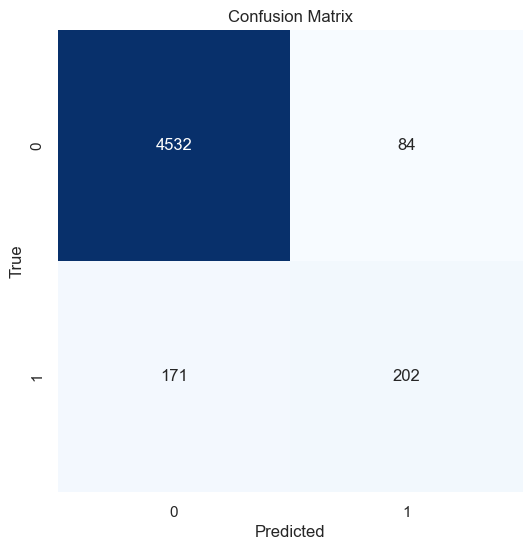

In [81]:
# confusion matrix for a random classifier model
plot_predictions(y_pred_rf)

Building several models

* **model1** : 300 estimators, with max-depth of 100
* **model2** : 500 estimators, criterion as 'entropy'
* **model3** : 800 estimators, criterion as 'entropy'

In [82]:
# model1
rf_model1 = RandomForestClassifier(n_estimators=300, max_depth=100, verbose=1,random_state=42)

# Train the model on the training data
rf_model1.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_rf1 = rf_model1.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [83]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf1) 
print(accuracy)
accuracies.append(accuracy)
print(classification_report(y_test, y_pred_rf1))

0.9488875526157546
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.71      0.54      0.61       373

    accuracy                           0.95      4989
   macro avg       0.83      0.76      0.79      4989
weighted avg       0.94      0.95      0.95      4989



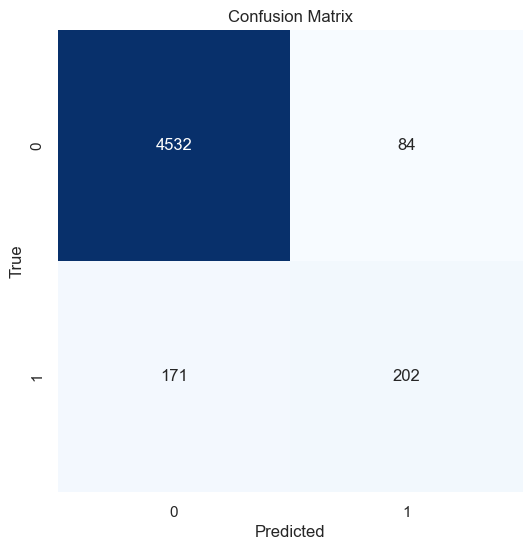

In [84]:
# confusion matrix for first random classifier model
plot_predictions(y_pred_rf1)

The trained model1 (Random Forest with 300 estimators and max depth 100) achieved an accuracy of approximately 94.83%. It demonstrates high precision and recall for class 0, indicating effective identification of this class, while class 1 shows lower precision and recall, suggesting room for improvement in identifying instances of this class. The weighted average F1-score of 0.95 indicates a good overall balance between precision and recall across both classes.

In [85]:
# model2
rf_model2 = RandomForestClassifier(n_estimators=500, criterion='entropy', verbose=1,random_state=42)

# Train the model on the training data
rf_model2.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_rf2 = rf_model2.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


In [86]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf2)
print(accuracy)
accuracies.append(accuracy)
print(classification_report(y_test, y_pred_rf2))

0.9488875526157546
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.71      0.54      0.61       373

    accuracy                           0.95      4989
   macro avg       0.84      0.76      0.79      4989
weighted avg       0.94      0.95      0.95      4989



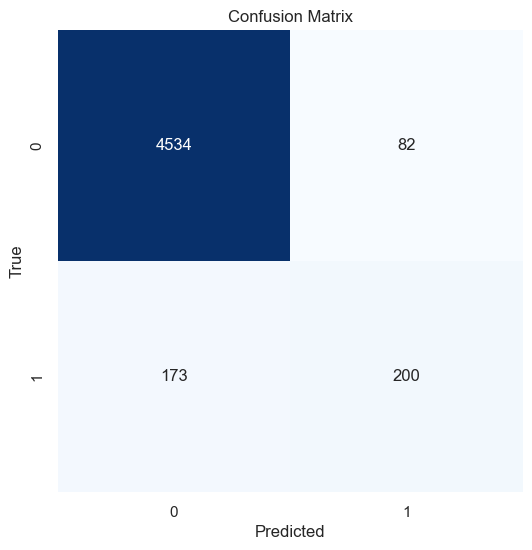

In [87]:
# confusion matrix for second random classifier model
plot_predictions(y_pred_rf2)

model2, a Random Forest with 500 estimators and 'entropy' criterion, achieved an accuracy of approximately 94.89%. While excelling in classifying class 0 with high precision and recall, its performance on class 1 is less optimal. The weighted average F1-score of 0.95 indicates a consistent balance between precision and recall across both classes.

In [88]:
# model3
rf_model3 = RandomForestClassifier(n_estimators=800, criterion='entropy', verbose=1,random_state=42)

# Train the model on the training data
rf_model3.fit(X_train, y_train)

# Predict the target values on the test data
y_pred_rf3 = rf_model3.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


The output suggests the progress of the Random Forest model training process for model3 using a single job (not parallelized). It shows the number of tasks completed and the time elapsed for each set of tasks. The training time increases as more tasks are completed, indicating the iterative process of building decision trees in the Random Forest ensemble.

In [89]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf3)
print(accuracy)
accuracies.append(accuracy)
print(classification_report(y_test, y_pred_rf3))

0.9488875526157546
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.71      0.54      0.61       373

    accuracy                           0.95      4989
   macro avg       0.84      0.76      0.79      4989
weighted avg       0.94      0.95      0.95      4989



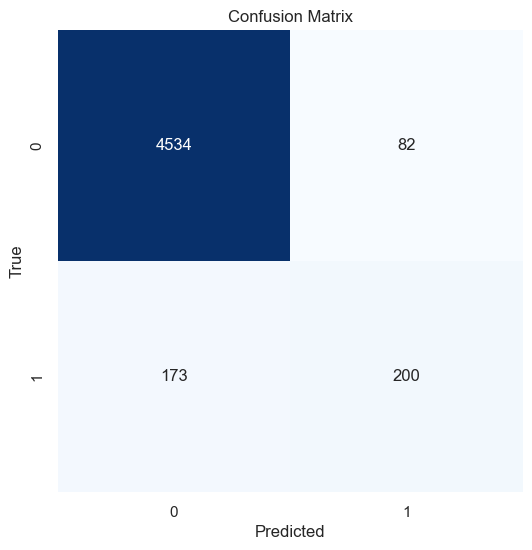

In [90]:
# confusion matrix for third random classifier model
plot_predictions(y_pred_rf3)

#### Gradient Boosting Classifier:
Gradient Boosting is another ensemble method that performs well in a wide range of tasks. It builds multiple weak learners sequentially, and it often delivers high predictive accuracy. Gradient Boosting can be useful when you need a high-performing model with good generalization.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = gradient_boost_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracies.append(accuracy)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9498897574664261
Confusion Matrix:
 [[4531   85]
 [ 165  208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4616
           1       0.71      0.56      0.62       373

    accuracy                           0.95      4989
   macro avg       0.84      0.77      0.80      4989
weighted avg       0.95      0.95      0.95      4989



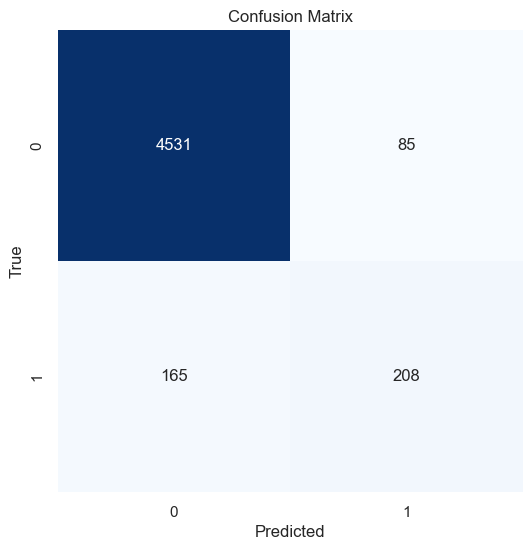

In [92]:
# confusion matrix for gradient boosting model
plot_predictions(y_pred)

* The Gradient Boosting Classifier has exhibited strong predictive accuracy for one class ("no") and moderate effectiveness for the other class ("yes"). Despite the difference in performance between the two classes, the model's overall high performance and ability to generalize suggest that it is a promising candidate for making accurate predictions on new and unseen data.

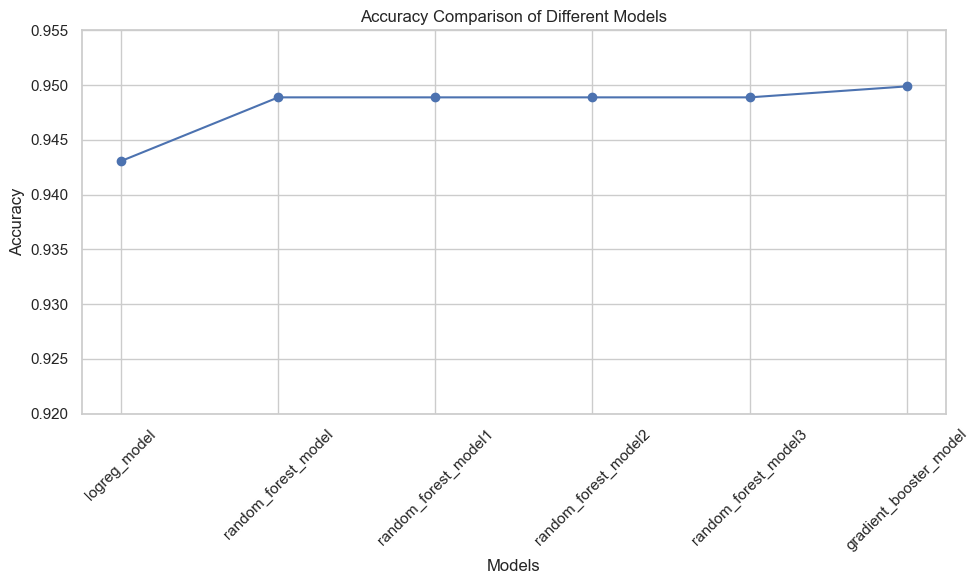

In [93]:
# plotting a line graph for the different models
models = ['logreg_model', 'random_forest_model', 'random_forest_model1','random_forest_model2','random_forest_model3', 'gradient_booster_model']

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.92, 0.955)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()